# Positive response: Poisson and Gamma regression

## Poisson Regression

Poisson Regression involves regression models in which the response variable is in the form of counts. For example, the count of number of car accidents or number of costumers in line at a reception desk. The expectation of the response variables is assumed to follow a Poisson distribution.

The general mathematical equation for Poisson regression is

$$
\log(E(y)) = \beta_0 + \beta_1 X_1+\beta_2 X_2+\dots+\beta_p X_p.
$$

## Simulated Data Example

We generate some artificial data using this logic.
Consider a dataset containing 100 observations with 6 variables. The `make_glm_data()` function allow you to generate simulated data. By specifying `k = 3`, here we set only 3 of the 6 variables have effect on the expectation of the response. 



In [20]:
import numpy as np
from abess.datasets import make_glm_data
np.random.seed(0)

n = 100
p = 6
k = 3
data = make_glm_data(n, p , "poisson", k)
print("non-zero:\n", np.nonzero(data.coef_))
print("real coef:\n", data.coef_)

non-zero:
 (array([0, 2, 5]),)
real coef:
 [8.97519346 0.         7.74067053 0.         0.         6.51945346]


In [21]:
print("the first 5 x:\n", data.x[0:5,])
print("the first 5 y:\n",data.y[0:5])

the first 5 x:
 [[ 0.10206398  0.02183018  0.07262124  0.14137693  0.13114375 -0.05882929]
 [ 0.05416649 -0.0097946   0.00670931  0.02410382  0.01464568  0.10943946]
 [ 0.04304185  0.00586154  0.04003711  0.01917503  0.10589907 -0.0053969 ]
 [ 0.01668117 -0.05009082 -0.14252873  0.03967493  0.06333941 -0.04255895]
 [ 0.1318219  -0.08451131  0.01578489 -0.0141981   0.10851494  0.1104834 ]]
the first 5 y:
 [0 3 0 1 9]


### Model Fitting

The `abessPoisson()` function in the `abess` package allows you to perform best subset selection in a highly efficient way. You can call the function using formula like: 


In [22]:
from abess import abessPoisson

model = abessPoisson(support_size = range(7))
model.fit(data.x, data.y)

abessPoisson(support_size=range(0, 7))

where `support_size` contains the level of sparsity we consider, and the program can adaptively choose the "best" one. The result of coefficients can be viewed on `model.coef_`:

In [23]:
print(model.coef_)

[6.97861535 0.         7.00639571 0.         0.         7.23806417]


So that the first, third and last variables are thought to be useful in the model (the chosen sparsity is 3), which is the same as "real" variables. What's more, the predicted coefficients are also close to the real ones.

### More on the results

Actually, we can also plot the path of coefficients in abess process. This can be computed by fitting the `support_size` in one number from 0 to 6:

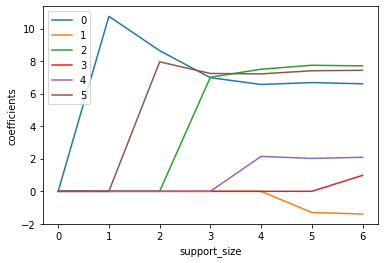

In [24]:
import matplotlib.pyplot as plt

pt = np.zeros((7, 6))
ic = np.zeros(7)
for sz in range(7):
    model = abessPoisson(support_size = [sz])
    model.fit(data.x, data.y)
    pt[sz, :] = model.coef_
    ic[sz] = model.ic_

for i in range(6):
    plt.plot(pt[:, i], label = i)

plt.xlabel('support_size')
plt.ylabel('coefficients')
plt.legend()
plt.show()

And the decreasing of information criterion (by default, we use EBIC):

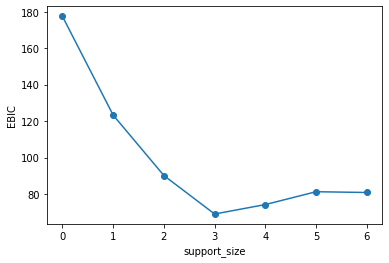

In [25]:
plt.plot(ic, 'o-')
plt.xlabel('support_size')
plt.ylabel('EBIC')
plt.show()

The lowest point is shown on `support_size=3` and that's why the program choose 3 variables as output.

## Gamma Regression

Gamma regression can be used when you have positive continuous response variables such as payments for insurance claims, or the lifetime of a redundant system. It is well known that the density of Gamma distribution can be represented as a function of a mean parameter ($\mu$) and a shape parameter ($\alpha$), specifically,

$$
f(y \mid \mu, \alpha)=\frac{1}{y \Gamma(\alpha)}\left(\frac{\alpha y}{\mu}\right)^{\alpha} e^{-\alpha y / \mu} {I}_{(0, \infty)}(y),
$$

where $I(\cdot)$ denotes the indicator function. In the Gamma regression model, response variables are assumed to follow Gamma distributions. Specifically, 

$$
y_i \sim Gamma(\mu_i, \alpha),
$$

where $1/\mu_i = x_i^T\beta$.

We apply the above procedure for gamma regression simply by using `abess.linear.abessGamma`. This time we consider the response variables as (continuous) levels of satisfaction. It has similar member functions and parameters to call.

Firstly, we also generate data from `make_glm_data()`:

In [ ]:
import numpy as np
from abess.datasets import make_glm_data
np.random.seed(0)

n = 100
p = 6
k = 3
data = make_glm_data(n, p , "gamma", k)
print("non-zero:\n", np.nonzero(data.coef_))
print("real coef:\n", data.coef_)

## R tutorial

For R tutorial, please view [https://abess-team.github.io/abess/articles/v04-PoissonGammaReg.html](https://abess-team.github.io/abess/articles/v04-PoissonGammaReg.html).